Sistema resuelto con solve()
Solución encontrada para x: [2.  1.8 0.4]


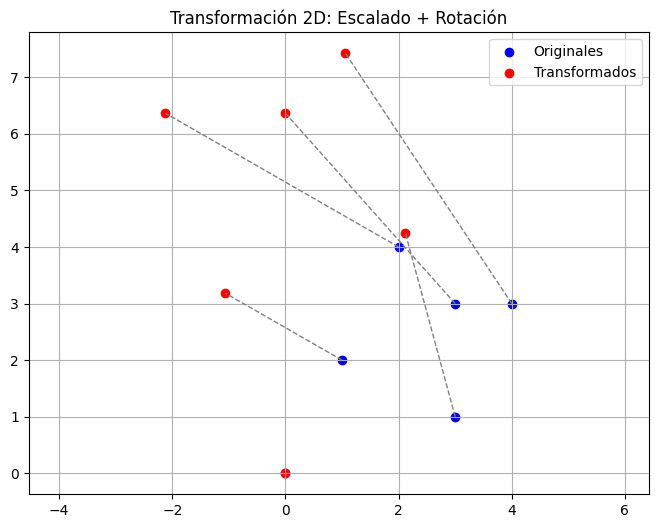

In [1]:
# importamos librerias necesarias:

import numpy as np
import matplotlib.pyplot as plt

# definimos matriz A y vector b (dados)
A = np.array([[3, -1, 2],
              [1,  2, 1],
              [2,  1, 3]], dtype=float)

b = np.array([5, 6, 7], dtype=float)

def resolver_sistema(A, b):
    """
    Intenta resolver Ax = b con solve(). Si no se puede, prueba con lstsq().

    A: matriz de coeficientes
    b: vector de constantes

    devuelve: vector solución x
    """
    try:
        x = np.linalg.solve(A, b)
        print("Sistema resuelto con solve()")
    except np.linalg.LinAlgError:
        print("imposible resolver con solve(), se utiliza lstsq()")
        x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)
    return x

# ejecutar y mostrar solución:

x_sol = resolver_sistema(A, b)
print("Solución encontrada para x:", x_sol)

# transformaciones 2D:

def crear_matriz_transformacion(angulo_grados, escala):
    """
    Crea una matriz de transformación combinando rotación y escalado.

    angulo_grados: ángulo de rotación (grados)
    escala: factor de escalado

    retorna: matriz T = S @ R
    """
    rad = np.radians(angulo_grados)

    # Matriz de rotación 2D
    R = np.array([
        [np.cos(rad), -np.sin(rad)],
        [np.sin(rad),  np.cos(rad)]
    ])

    # Matriz de escalado
    S = np.array([
        [escala, 0],
        [0, escala]
    ])

# transformación compuesta: escalar * rotar

    T = S @ R
    return T

def aplicar_transformacion(puntos, T):
    """
    Aplica la matriz T a todos los puntos del conjunto.

    puntos: array de forma (n, 2)
    T: matriz de transformación 2x2

    devuelve: puntos transformados
    """

# usamos T transpuesta por convención

    return puntos @ T.T

def graficar_puntos(originales, transformados):
    """
    Dibuja los puntos originales y sus versiones transformadas,
    conectándolos con líneas para ver el cambio.

    originales: (n, 2)
    transformados: (n, 2)
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(originales[:, 0], originales[:, 1], color="blue", label="Originales")
    plt.scatter(transformados[:, 0], transformados[:, 1], color="red", label="Transformados")

# se debe conectar cada punto original con su transformado:

    for i in range(len(originales)):
        x_vals = [originales[i, 0], transformados[i, 0]]
        y_vals = [originales[i, 1], transformados[i, 1]]
        plt.plot(x_vals, y_vals, 'gray', linestyle='--', linewidth=1)

    plt.title("Transformación 2D: Escalado + Rotación")
    plt.legend()
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# puntos fijos del ejercicio:

puntos = np.array([
    [1, 2],
    [3, 1],
    [2, 4],
    [4, 3],
    [0, 0],
    [3, 3]
], dtype=float)

# parámetros dados:

angulo = 45
escala = 1.5

# creamos y aplicamos la transformación:

T = crear_matriz_transformacion(angulo, escala)
puntos_transformados = aplicar_transformacion(puntos, T)

# finalmente visualizamos todo:

graficar_puntos(puntos, puntos_transformados)

# Sistemas de Ecuaciones y Transformaciones 2D

En esta actividad se desarrollaron dos objetivos principales: la resolución de un sistema de ecuaciones lineales mediante álgebra matricial y la aplicación de transformaciones lineales en el plano bidimensional.

### Resolución de sistemas de ecuaciones

Se trabajó con una matriz A de dimensiones 3x3 y un vector b de tres elementos. El sistema de ecuaciones lineales Ax = b fue resuelto utilizando `np.linalg.solve()`, que permite obtener una solución exacta siempre que la matriz A sea cuadrada y no singular. En caso de presentarse un sistema sobredeterminado o con matriz no invertible, se contempló el uso de `np.linalg.lstsq()` para obtener una solución por mínimos cuadrados.

La solución obtenida para el vector x fue desplegada en consola, permitiendo verificar su validez con respecto a los valores originales del sistema.

### Aplicación de transformaciones lineales 2D

En una segunda parte, se implementó una transformación lineal compuesta sobre un conjunto de puntos en el plano. Se construyeron dos matrices:

- Una matriz de rotación correspondiente a un ángulo de 45 grados, convertido previamente a radianes.
- Una matriz de escalado con factor 1.5.

Ambas matrices fueron multiplicadas para obtener una transformación compuesta, la cual fue aplicada a un conjunto de puntos fijos utilizando álgebra matricial. Los puntos originales y transformados se visualizaron utilizando Matplotlib, conectando cada punto original con su correspondiente transformado para ilustrar gráficamente el efecto de la transformación.

### Conclusión

Este ejercicio permitió poner en práctica conceptos fundamentales del álgebra lineal aplicados a problemas reales. La implementación de soluciones numéricas mediante `NumPy` refuerza el vínculo entre teoría matemática y programación, y evidencia cómo estas herramientas son utilizadas en campos como machine learning, simulaciones gráficas y análisis de datos.